In [17]:
import networkx as nx
import random

def assign_node_types(G, num_rich):
    """Assigns the first `num_rich` nodes as 'rich' and the rest as 'poor'."""
    for i, node in enumerate(G.nodes()):
        node_type = 'rich' if i < num_rich else 'poor'
        G.nodes[node]['type'] = node_type  # Assign 'rich' or 'poor' type
        G.nodes[node]['label'] = node_type  # Assign 'rich' or 'poor' label as well



def xbs_attribute_rewire(G, p=0.8, iterations=20000):
    """XBS Algorithm that considers node attributes (rich/poor) for assortativity."""
    
    edges = list(G.edges())  # Initial edge list
    
    for _ in range(iterations):
        if len(edges) < 2:
            break  # Avoid errors when there are not enough edges left

        # Pick two random edges (A—B) and (C—D)
        (A, B), (C, D) = random.sample(edges, 2)

        # Ensure unique nodes (skip if edges share nodes)
        if len({A, B, C, D}) < 4:
            continue

        # Get node types
        type_A, type_B = G.nodes[A]['type'], G.nodes[B]['type']
        type_C, type_D = G.nodes[C]['type'], G.nodes[D]['type']

        new_edges = None  # Default to no change

        # Prefer rewiring within the same type
        if random.random() < p:
            # If edges mix rich & poor, try to rewire to increase segregation
            #if type_A != type_B or type_C != type_D:
            if type_A != type_B and type_C != type_D:
                if type_A == type_C and type_B == type_D:
                    new_edges = [(A, C), (B, D)]
                elif type_A == type_D and type_B == type_C:
                    new_edges = [(A, D), (B, C)]
        else:
            # Random rewiring (Maslov-Sneppen)
            new_edges = [(A, D), (B, C)]

        # Ensure new edges do not already exist and do not form self-loops
        if new_edges and all((u, v) not in G.edges() and (v, u) not in G.edges() for u, v in new_edges):
            # Remove old edges
            if G.has_edge(A, B) and G.has_edge(C, D):  # Check before removing
                G.remove_edge(A, B)
                G.remove_edge(C, D)
                
                # Add new edges
                G.add_edges_from(new_edges)
                
                # Update edge list dynamically
                edges.remove((A, B))
                edges.remove((C, D))
                edges.extend(new_edges)

    return G


In [65]:
import networkx as nx
import random
import os


# Step 1: Generate a Scale-Free Network
n, m = 1000, 5
num_rich = 50
p_value = 0.8
G_undirected = nx.barabasi_albert_graph(n, m)

# Step 2: Assign "rich" and "poor" labels
assign_node_types(G_undirected, num_rich)

# Step 3: Apply XBS Algorithm with Attribute-Based Assortativity
G_assortative = xbs_attribute_rewire(G_undirected, p=p_value, iterations=200000)

# Step 4: Convert to a Directed Bidirectional Graph
G_directed = nx.DiGraph()
for u, v in G_assortative.edges():
    G_directed.add_edge(u, v)
    G_directed.add_edge(v, u)  # Ensure bidirectionality

# Step 5: Save to Pajek format
# nx.write_pajek(G_directed, "xbs_rich_poor_segregation.net")
G_directed.nodes()

foldername = f"xbs_p{p_value}_rich{num_rich}_out_degree_{2*m}"
os.makedirs(foldername, exist_ok=True)
for i in range(500):
    filename = f"xbs_p{p_value}_rich{num_rich}_out_degree_{2*m}_{i+1}.net"
    filepath = os.path.join(foldername, filename)
    nx.write_pajek(G_directed, filepath)

print("XBS-Assortative Network (Rich-Poor Segregation) saved as 'xbs_rich_poor_segregation.net'.")

XBS-Assortative Network (Rich-Poor Segregation) saved as 'xbs_rich_poor_segregation.net'.


In [5]:
import networkx as nx

# Step 1: Generate a Scale-Free Network
n, m = 900, 5
G_undirected = nx.barabasi_albert_graph(n, m)

# Step 4: Convert to a Directed Bidirectional Graph
G_directed = nx.DiGraph()
for u, v in G_undirected.edges():
    G_directed.add_edge(u, v)
    G_directed.add_edge(v, u)  # Ensure bidirectionality

for i in range(100):
    filename = f"homogen900_out_degree_{2*m}_{i+1}.net"
    nx.write_pajek(G_directed, filename)

In [36]:
"""print(nx.sigma(G_undirected))
print(nx.sigma(G_directed))

print(nx.omega(G_undirected))
print(nx.omega(G_directed))"""

G = nx.barabasi_albert_graph(1000, 5)
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Average degree:", avg_degree)

Average degree: 9.95


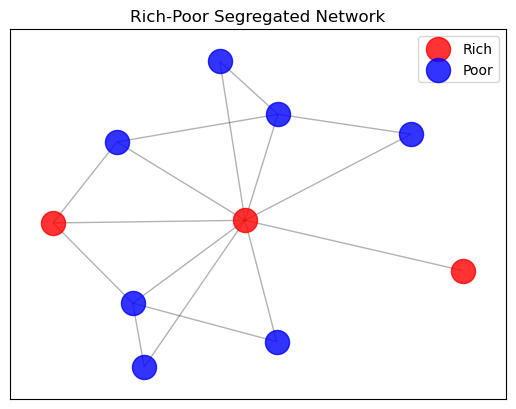

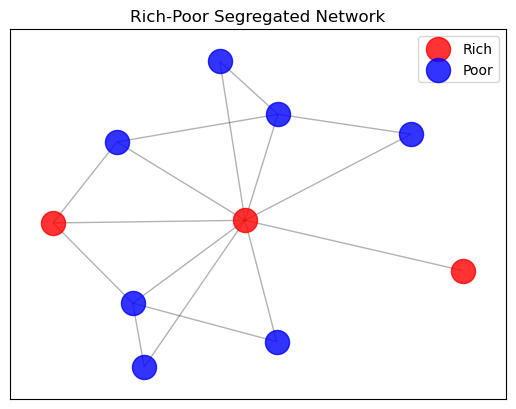

In [31]:
#teszt

G_undirected = nx.barabasi_albert_graph(10, 2)
assign_node_types(G_undirected, 3)
plot_graph(G_undirected)
nx.write_pajek(G_undirected, "aaa_test_network.net")
G = nx.read_pajek("aaa_test_network.net")
plot_graph(G)

In [95]:
n, m = 1000, 5
num_rich = 300
p_value = 0.8
H = nx.barabasi_albert_graph(n, m)


NameError: name 'head' is not defined

In [55]:
print("Before:", nx.degree_assortativity_coefficient(G_undirected))
print("After:", nx.degree_assortativity_coefficient(G_assortative))


Before: -0.02012335047268094
After: -0.02012335047268094


In [25]:
import matplotlib.pyplot as plt

def plot_graph(G):
    """Plots the graph with red dots for rich and blue dots for poor."""
    #pos = nx.spring_layout(G, seed=42)  # Layout for visualization
    #pos = nx.spectral_layout(G)
    pos = nx.fruchterman_reingold_layout(G, seed=42)


    # Separate nodes by type
    rich_nodes = [node for node in G.nodes() if G.nodes[node]['type'] == 'rich']
    poor_nodes = [node for node in G.nodes() if G.nodes[node]['type'] == 'poor']

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=rich_nodes, node_color='red', label="Rich", alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=poor_nodes, node_color='blue', label="Poor", alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3)

    # Display the graph
    plt.legend()
    plt.title("Rich-Poor Segregated Network")
    plt.show()

# Call the function to plot
#plot_graph(G_assortative)


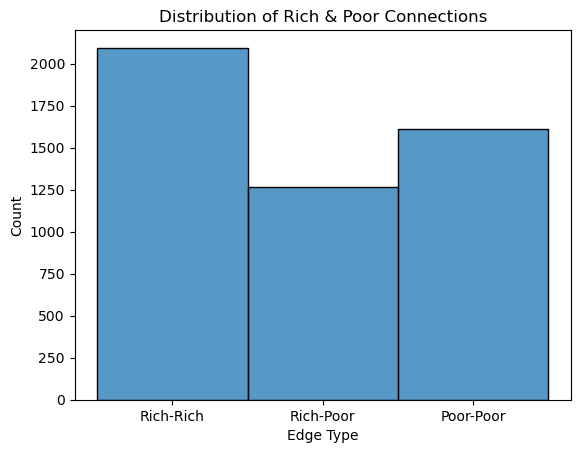

In [67]:
import seaborn as sns

def plot_connectivity_histogram(G):
    """Plots a histogram of the edge types in the network."""
    edge_types = []

    for u, v in G.edges():
        type_u = G.nodes[u]["type"]
        type_v = G.nodes[v]["type"]

        if type_u == "rich" and type_v == "rich":
            edge_types.append("Rich-Rich")
        elif type_u == "poor" and type_v == "poor":
            edge_types.append("Poor-Poor")
        else:
            edge_types.append("Rich-Poor")

    # Plot histogram
    sns.histplot(edge_types, discrete=True)
    plt.title("Distribution of Rich & Poor Connections")
    plt.xlabel("Edge Type")
    plt.ylabel("Count")
    plt.show()

# Plot histogram of connectivity
plot_connectivity_histogram(G_assortative)


In [57]:
import networkx as nx

# Load Pajek file
G = nx.read_pajek("xbs_p0.8_rich100_out_degree_10_1.net")

# Convert to undirected (APL needs connected components)
G = G.to_undirected()

if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
else:
    # Use the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(G_sub)

print("Average Path Length:", avg_path_length)

from networkx.generators.random_graphs import erdos_renyi_graph

n = G.number_of_nodes()
k = sum(dict(G.degree()).values()) / n  # average degree
p = k / (n - 1)

G_rand = erdos_renyi_graph(n, p)
largest_cc_rand = max(nx.connected_components(G_rand), key=len)
G_rand_sub = G_rand.subgraph(largest_cc_rand)
apl_rand = nx.average_shortest_path_length(G_rand_sub)
print("Random Graph APL:", apl_rand)

# Convert to undirected simple graph (no parallel edges)
G_simple = nx.Graph(G)  # if directed, use G.to_undirected() first then convert

cc_real = nx.average_clustering(G_simple)
cc_rand = nx.average_clustering(G_rand)

print("Clustering Coefficient (Real):", cc_real)
print("Clustering Coefficient (Random):", cc_rand)


Average Path Length: 3.161263263263263
Random Graph APL: 3.28166966966967
Clustering Coefficient (Real): 0.033519638793160965
Clustering Coefficient (Random): 0.010023426049354843


In [61]:
G = nx.read_pajek("xbs_p0.8_rich100_out_degree_10_1.net")


from networkx.algorithms.community import greedy_modularity_communities

G_simple = nx.Graph(G)  # if needed

communities = greedy_modularity_communities(G_simple)

for i, community in enumerate(communities):
    # Sort numerically
    sorted_nodes = sorted(community, key=lambda x: int(x))
    print(f"Community {i+1}: {sorted_nodes}")




Community 1: ['100', '101', '102', '107', '109', '118', '120', '121', '122', '123', '124', '126', '127', '130', '135', '136', '138', '140', '141', '149', '150', '151', '155', '157', '159', '162', '163', '167', '169', '171', '174', '175', '176', '177', '178', '182', '184', '185', '189', '190', '193', '197', '199', '200', '206', '207', '211', '212', '220', '221', '223', '229', '231', '236', '242', '245', '249', '252', '258', '263', '265', '267', '269', '271', '272', '275', '277', '279', '280', '283', '284', '287', '291', '292', '297', '299', '302', '304', '307', '314', '331', '336', '338', '349', '350', '354', '356', '363', '364', '365', '366', '369', '376', '379', '380', '381', '384', '385', '386', '387', '390', '391', '397', '399', '402', '403', '406', '410', '413', '419', '420', '421', '425', '427', '428', '429', '431', '434', '445', '451', '452', '453', '456', '457', '461', '463', '465', '468', '469', '472', '475', '479', '480', '481', '483', '484', '486', '487', '488', '493', '494',